In [1]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)

val_array = []
n = 0
beta = .1
with open('data/soc-LiveJournal1counts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    Y1.append(y1+y2*beta)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


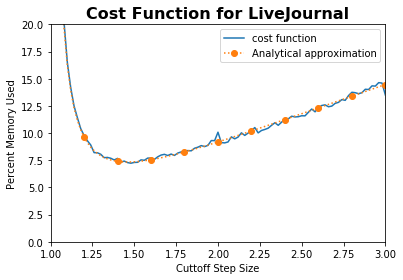

<Figure size 432x288 with 0 Axes>

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
%matplotlib inline

Memory = lambda a : lambda x : (x-1)/(1-x**(2-a)) + 1/(2-a)
Computation = lambda a : lambda x : 1/(1-x**(2-a))
Cost = lambda a,b : lambda x : Memory(a)(x) + b*Computation(a)(x)

derivative = lambda alpha,beta: lambda x : (\
                         1+(1-a)*x**(2-a)+(b*(2-a)-2+a)*(x-1)**(1-a)
                        )/((1-x**(2-a))**2)
reduced_derivative = lambda a,b: lambda x : 1+(1-a)*x**(2-a)\
                                             +((b-1)*(2-a))*(x-1)**(1-a)

X  = []
_Y1 = []
_Y2 = []
a = 2.068
b = .1
ititial_guess = 1.5
result = fsolve(reduced_derivative(a,b), initial_guess)[0]


for j in range(98):
    i = 3-j/50
    X.append(i)
    _Y1.append(Cost(a,b)(i))
    _Y2.append(derivative(a,b)(i))
plt.plot(X,Y1,label = "cost function")
plt.plot(X,_Y1,'o:',markevery = 10,label = "Analytical approximation")
#plt.plot(X,_Y2)
#plt.axvline(x=result)
plt.plot(result)
plt.ylim(0,20)
plt.xlim(1,3)
# Add legend
plt.legend()
# Add title and x, y labels
plt.title("Cost Function for LiveJournal", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Percent Memory Used")
plt.show()
plt.savefig('results/livejournal.png')

Number of data points: 100


logp = -15,352, ||grad|| = 7.0593e-05: 100%|██████████| 34/34 [00:00<00:00, 249.33it/s]  
Sequential sampling (2 chains in 1 job)
NUTS: [s]
100%|██████████| 15500/15500 [03:07<00:00, 82.78it/s]
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
There were 43 divergences after tuning. Increase `target_accept` or reparameterize.


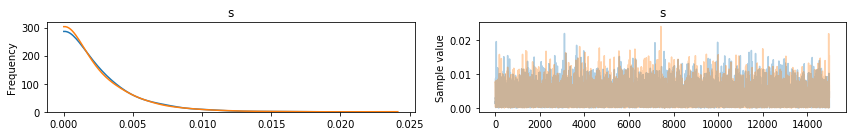

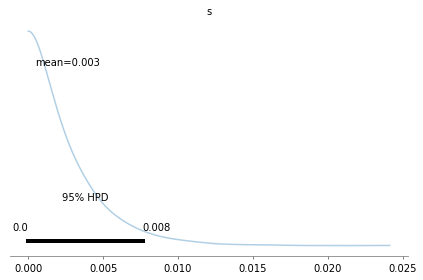

In [6]:
import theano.tensor as tt
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline

val_array = []
with open('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        while (i>0):
            i-=1
            val_array.append(a)

data =np.random.choice(np.array(val_array),(100))

N = len( data )

print( "Number of data points: %d" % N )

def build_model():
    with pm.Model() as model:
        # unsure about the prior...
        #s = pm.Normal( 's', mu=0.0, sd=100 )
        s = pm.HalfNormal( 's', sd=10 )
        #s = pm.Gamma('s', alpha=4, beta=10)

        def logp( f ):
            r = tt.arange( 1, N+1 )
            return -s * tt.sum( f * tt.log(r) ) - tt.sum( f ) * tt.log( tt.sum(tt.power(1.0/r,s)) )

        pm.DensityDist( 'obs', logp=logp, observed={'f': data} )

    return model


def run( n_samples=15000 ):
    model = build_model()
    with model:
        start = pm.find_MAP()
        step = pm.NUTS( scaling=start )
        trace = pm.sample( n_samples, step=step, start=start )

    pm.summary( trace )
    pm.traceplot( trace )
    pm.plot_posterior( trace, kde_plot=True )
    plt.show()

if __name__ == '__main__':
    run()

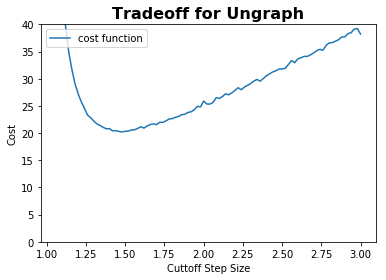

<Figure size 432x288 with 0 Axes>

In [130]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)

val_array = []
n = 0
beta = .1
with open('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    Y1.append(y1+y2*beta)
plt.plot(X,Y1,label = "cost function")
plt.ylim(0,40)
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Tradeoff for Ungraph", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Cost")
plt.show()

plt.savefig('results/ungraph_costfunction.png')

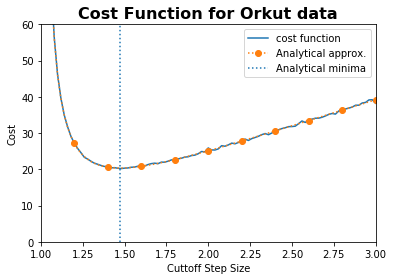

<Figure size 432x288 with 0 Axes>

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
%matplotlib inline

Memory = lambda a : lambda x : (x-1)/(1-x**(2-a)) + 1/(2-a)
Computation = lambda a : lambda x : 1/(1-x**(2-a))
Cost = lambda a,b : lambda x : Memory(a)(x) + b*Computation(a)(x)

derivative = lambda a,b: lambda x : (\
                         1+(1-a)*x**(2-a)+(b*(2-a)-2+a)*(x)**(1-a)
                        )/((1-x**(2-a))**2)
reduced_derivative = lambda a,b: lambda x : 1+(1-a)*x**(2-a)\
                                             +((b-1)*(2-a))*(x)**(1-a)

X  = []
_Y1 = []
_Y2 = []
a = 2.0239
b = .1
ititial_guess = 1.3
result = fsolve(reduced_derivative(a,b), initial_guess)[0]


for j in range(98):
    i = 3-j/50
    X.append(i)
    _Y1.append(Cost(a,b)(i))
    _Y2.append(derivative(a,b)(i))
plt.plot(X,Y1,label = "cost function")
plt.plot(X,_Y1,'o:',markevery = 10,label = "Analytical approx.")
#plt.plot(X,_Y2)
plt.axvline(x=result,linestyle = ':',label = "Analytical minima")
plt.plot(result)
plt.ylim(0,60)
plt.xlim(1,3)
# Add legend
plt.legend(loc='upper right')
# Add title and x, y labels
plt.title("Cost Function for Orkut data", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Cost")
plt.show()
plt.savefig('results/ungraph_costfunction.png')

In [6]:
import math
from scipy.optimize import fsolve

reduced_cost_derivative = lambda a,b: lambda x : 1+(1-a)*x**(2-a)\
                                             +((b-1)*(2-a))*(x)**(1-a)

alpha = 2.066606331495111
beta = .25
initial_guess = 1.5

result = fsolve(reduced_cost_derivative(alpha,beta), initial_guess)[0]
print(result)

alpha  = 2.0237927571316328
result = fsolve(reduced_cost_derivative(alpha,beta), initial_guess)[0]
print(result)


1.753597239312002
1.7741883220711043


In [2]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)

val_array = []
n = 0
beta = .1
#with open('data/soc-LiveJournal1counts.txt','r') as f:
with open ('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = [ 2.68663, 2.00309, 1.75360, 1.47267]
#X =  [2.63295 , 1.97493 , 1.77419, 1.46113]

Y1 = []

for i in X:
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
 #   print(y3/(y1+y3))
    print(y3)
    print('')


43.02959689501204

43.02959689501204

43.02959689501204

43.02959689501204

